In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [69]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

### Projeto 3
Esse projeto tem a intenção de criar uma previsão de projetos web que serão finalização de acordo com os valores estimados e os projetos que foram finalizados ou não.

In [70]:
dados.columns = ["finished", "expected_hours", "price"]

### troco o valor da coluna finished pra facilitar a interpretação

In [71]:
dados.finished = dados.finished.map({0: 1, 1: 0})

#### Crio uma visualização para os dados com seaborn

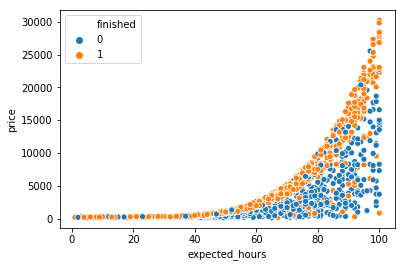

In [72]:
sns.scatterplot(x="expected_hours", y="price", hue="finished", data=dados)

#### Visualização do dados em gráficos separados

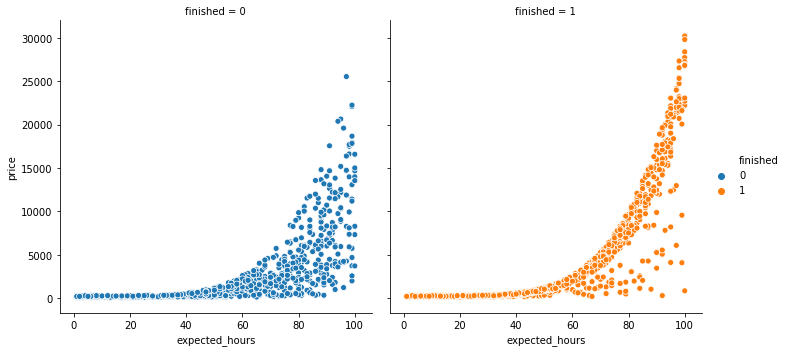

In [73]:
sns.relplot(x="expected_hours", y="price", col="finished", hue="finished", data=dados)

#### Treinamento do modelo

In [74]:
x = dados[['expected_hours', 'price']]
y = dados['finished']
SEED = 5
treino_x, test_x, treino_y, test_y = train_test_split(x, y, random_state=SEED, test_size=0.25, stratify=y)

In [75]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(test_x)

/home/kaiocesarsp/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [76]:
acuracia = accuracy_score(test_y, previsoes) *  100
print("Treinaremos com %d elemementos e testaremos com %d elementos" % (len(treino_x), len(test_x)))
print("A acurácia foi %.2f%%" % (acuracia))

Treinaremos com 1617 elemementos e testaremos com 540 elementos
A acurácia foi 56.67%


#### Chutar uma previsão aleatória

In [77]:
previsoes_de_base = np.ones(540)
acuracia_de_base = accuracy_score(test_y, previsoes_de_base) * 100
print("A acurácia do algoritimo de baseline foi %.2f%%" % (acuracia_de_base))

A acurácia do algoritimo de baseline foi 52.59%


### Curva de decisão

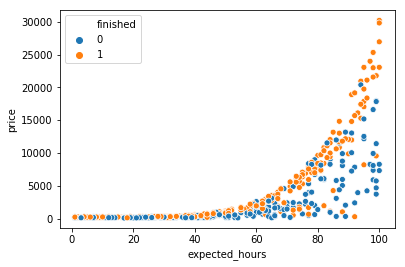

In [78]:
sns.scatterplot(x="expected_hours", y="price", hue=test_y, data=test_x)

##### definição da quantidade de pixels que o gráfica terá

In [79]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

#### cria-se um ndarray para alocarmos o pontos dentro de uma matrix de pixel de 100x100

In [80]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

#### cria-se um grid para alocar os valores de x e y

In [81]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

#### Faz-se a previsão do modelo com base nos pontos que foram criados

In [82]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

#### Visualização no gráfico

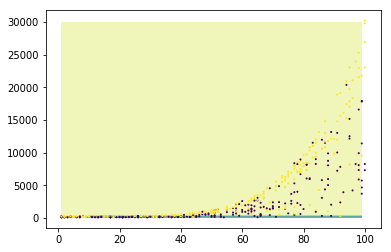

In [84]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)